<a href="https://colab.research.google.com/github/GetnetN/my-projects/blob/main/Melanoma%20Skin%20Cancer%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Concatenate, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50

In [ ]:
import os
import random
import shutil

# Set the path to your main 'train' folder
main_folder = '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/train/train'

# Create directories for training and testing data
train_folder = '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/train'
test_folder = '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/test'
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Define the subfolders (benign and malignant)
subfolders = ['benign', 'malignant']

# Set the split ratio (70% training, 30% testing)
split_ratio = 0.7

# Iterate through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    images = os.listdir(subfolder_path)
    num_images = len(images)
    num_train = int(num_images * split_ratio)

    # Shuffle the list of images
    random.shuffle(images)

    # Split into training and testing sets
    train_images = images[:num_train]
    test_images = images[num_train:]

    # Copy training images to the train_data_folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_folder, subfolder)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    # Copy testing images to the test_data_folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_folder, subfolder)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

print("Splitting completed successfully.")


Splitting completed successfully.


In [ ]:
input_shape = (224, 224, 3)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False
for layer in resnet_model.layers:
    layer.trainable = False
input_tensor = Input(shape=input_shape)
vgg_output = vgg_model(input_tensor)
resnet_output = resnet_model(input_tensor)
merged = Concatenate()([GlobalAveragePooling2D()(vgg_output), GlobalAveragePooling2D()(resnet_output)])
x = Dense(512, activation='relu')(merged)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 7, 7, 512)            1471468   ['input_3[0][0]']             
                                                          8                                       
                                                                                                  
 resnet50 (Functional)       (None, 7, 7, 2048)           2358771   ['input_3[0][0]']             
                                                          2                                       
                                                                                              

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

Found 7423 images belonging to 2 classes.
Found 3183 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=800 // 32
)

<ipython-input-6-794030e3dcad>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
62/62 [==============================] - 620s 10s/step - loss: 0.6854 - accuracy: 0.6282 - val_loss: 0.5217 - val_accuracy: 0.7188
Epoch 2/100
62/62 [==============================] - 252s 4s/step - loss: 0.4985 - accuracy: 0.7586 - val_loss: 0.4800 - val_accuracy: 0.7688
Epoch 3/100
62/62 [==============================] - 181s 3s/step - loss: 0.4007 - accuracy: 0.8367 - val_loss: 0.3229 - val_accuracy: 0.8775
Epoch 4/100
62/62 [==============================] - 138s 2s/step - loss: 0.3647 - accuracy: 0.8458 - val_loss: 0.2935 - val_accuracy: 0.8900
Epoch 5/100
62/62 [==============================] - 120s 2s/step - loss: 0.3162 - accuracy: 0.8795 - val_loss: 0.2953 - val_accuracy: 0.8875
Epoch 6/100
62/62 [==============================] - 93s 1s/step - loss: 0.2802 - accuracy: 0.8947 - val_loss: 0.3191 - val_accuracy: 0.8712
Epoch 7/100
62/62 [==============================] - 75s 1s/step - loss: 0.3005 - accuracy: 0.8800 - val_loss: 0.2718 - val_accuracy: 0.9013
Epoch 8

In [ ]:
model.save('/content/drive/MyDrive/melanoma_cancer_dataset/SavedModels/melanoma_without_segmentation.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


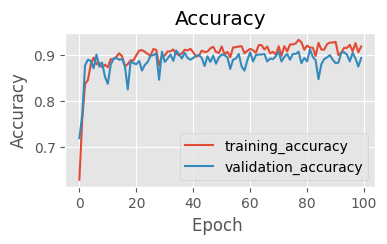

In [ ]:
N = np.arange(0, 100) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["accuracy"], label="training_accuracy")
plt.plot(N, history.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("accc.png")

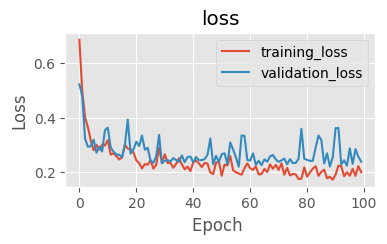

In [ ]:
N = np.arange(0, 100) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["loss"], label="training_loss")
plt.plot(N, history.history["val_loss"], label="validation_loss")
plt.title("loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")
plt.legend()
plt.savefig("loss.png")

In [ ]:
test_data_dir='/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/UnetSegmentedM/test'
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32) # set as training data

Found 3183 images belonging to 2 classes.


In [ ]:
import cv2

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_one_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_one_prediction = np.argmax(model.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)



1/1 [==============================] - 0s 22ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)

    plt.figure(figsize=(3,3))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=15) #15 refers to the degree of rotation of text
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))




Model Accuracy 0.754
              precision    recall  f1-score   support

      benign       0.91      0.56      0.70       500
   malignant       0.68      0.94      0.79       500

    accuracy                           0.75      1000
   macro avg       0.80      0.75      0.74      1000
weighted avg       0.80      0.75      0.74      1000



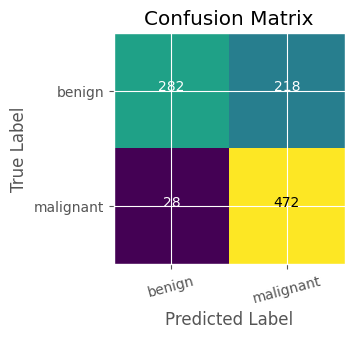

In [ ]:
clf_report(true_value, model_one_pred)

model using U-Net Segmentation

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Concatenate, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50


In [ ]:
input_shape = (224, 224, 3)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


for layer in vgg_model.layers:
    layer.trainable = False
for layer in resnet_model.layers:
    layer.trainable = False
input_tensor = Input(shape=input_shape)
vgg_output = vgg_model(input_tensor)
resnet_output = resnet_model(input_tensor)
merged = Concatenate()([GlobalAveragePooling2D()(vgg_output), GlobalAveragePooling2D()(resnet_output)])
x = Dense(1024, activation='relu')(merged)
#x = Dense(1024, activation='relu')(x)
#x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

Found 7423 images belonging to 2 classes.
Found 3183 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=800 // 32
)

<ipython-input-10-794030e3dcad>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
62/62 [==============================] - 73s 942ms/step - loss: 0.7480 - accuracy: 0.6225 - val_loss: 0.5176 - val_accuracy: 0.6875
Epoch 2/100
62/62 [==============================] - 29s 474ms/step - loss: 0.4458 - accuracy: 0.7978 - val_loss: 0.3907 - val_accuracy: 0.8525
Epoch 3/100
62/62 [==============================] - 26s 418ms/step - loss: 0.3854 - accuracy: 0.8463 - val_loss: 0.3788 - val_accuracy: 0.8662
Epoch 4/100
62/62 [==============================] - 21s 345ms/step - loss: 0.3441 - accuracy: 0.8584 - val_loss: 0.3576 - val_accuracy: 0.8462
Epoch 5/100
62/62 [==============================] - 25s 411ms/step - loss: 0.3321 - accuracy: 0.8690 - val_loss: 0.4435 - val_accuracy: 0.8163
Epoch 6/100
62/62 [==============================] - 26s 412ms/step - loss: 0.3034 - accuracy: 0.8835 - val_loss: 0.3685 - val_accuracy: 0.8525
Epoch 7/100
62/62 [==============================] - 26s 416ms/step - loss: 0.3287 - accuracy: 0.8599 - val_loss: 0.3585 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedmodels/melanoma_withouts_segmentation.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


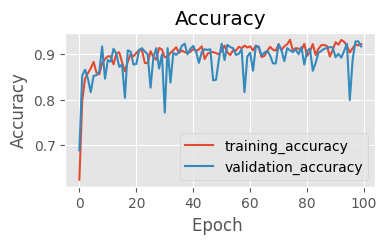

In [ ]:
N = np.arange(0, 100) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["accuracy"], label="training_accuracy")
plt.plot(N, history.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedimages/accwithoutanyprocessing.png")

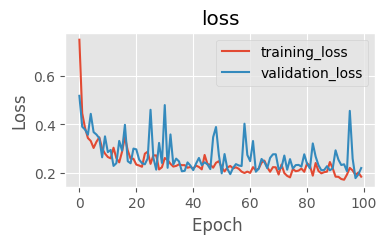

In [ ]:

N = np.arange(0, 100) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["loss"], label="training_loss")
plt.plot(N, history.history["val_loss"], label="validation_loss")
plt.title("loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")
plt.legend()
plt.savefig("/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedimages/losswithoutanyprocessing.png")


In [ ]:
import cv2

In [ ]:
test_data_dir='/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/test'
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32) # set as training data

Found 3183 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedmodels/melanoma_withouts_segmentation.h5')

In [ ]:
import cv2
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_one_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_one_prediction = np.argmax(model.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)



1/1 [==============================] - 0s 40ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)

    plt.figure(figsize=(3,3))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=15) #15 refers to the degree of rotation of text
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))




Model Accuracy 0.681746779767515
              precision    recall  f1-score   support

      benign       0.96      0.40      0.57      1651
   malignant       0.60      0.98      0.75      1532

    accuracy                           0.68      3183
   macro avg       0.78      0.69      0.66      3183
weighted avg       0.79      0.68      0.65      3183



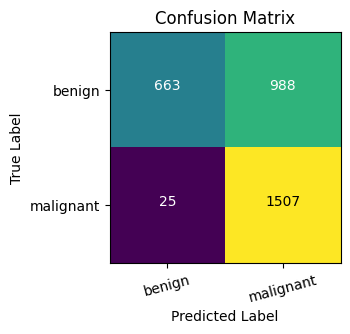

In [ ]:
clf_report(true_value, model_one_pred)


100/100 [==============================] - 38s 276ms/step


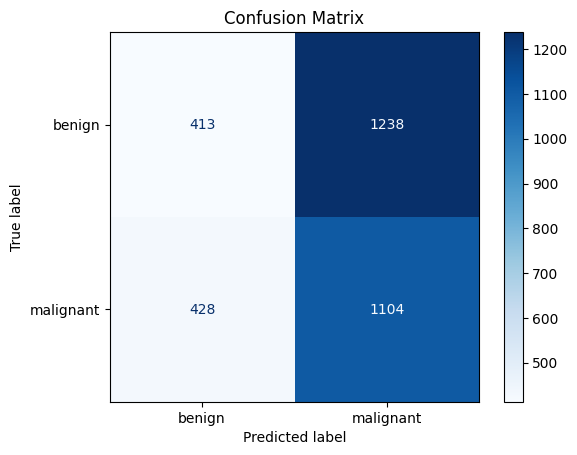

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Make Predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert Predictions and Ground Truths to Labels
predicted_classes = np.argmax(predictions, axis=1)  # Assuming your model outputs probabilities for each class
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Extract class labels from the generator

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


100/100 [==============================] - 22s 221ms/step
Class: benign
Precision: 0.535077288941736
Recall: 0.2725620835857056
-------------------------
Class: malignant
Precision: 0.48719043552519214
Recall: 0.7447780678851175
-------------------------


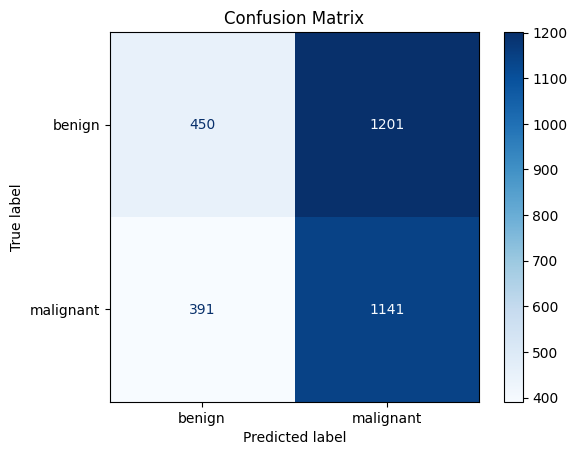

Overall Accuracy: 0.4998429154885328


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Make Predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Step 2: Convert Predictions and Ground Truths to Labels
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
true_classes = test_generator.classes  # Ground truth labels
class_labels = list(test_generator.class_indices.keys())  # Class labels in the order they appear in the generator

# Step 3: Compute Metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average=None)
recall = recall_score(true_classes, predicted_classes, average=None)
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Display Metrics and Confusion Matrix
for i, label in enumerate(class_labels):
    print(f"Class: {label}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print("-------------------------")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print(f"Overall Accuracy: {accuracy}")


**Changing learning rate and fully conected layers **


In [ ]:
input_shape = (224, 224, 3)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


for layer in vgg_model.layers:
    layer.trainable = False
for layer in resnet_model.layers:
    layer.trainable = False
input_tensor = Input(shape=input_shape)
vgg_output = vgg_model(input_tensor)
resnet_output = resnet_model(input_tensor)
merged = Concatenate()([GlobalAveragePooling2D()(vgg_output), GlobalAveragePooling2D()(resnet_output)])
x = Dense(1024, activation='relu')(merged)
x = Dense(1024, activation='relu')(x)
#x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

Found 7423 images belonging to 2 classes.
Found 3183 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=800 // 32
)

<ipython-input-5-794030e3dcad>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
62/62 [==============================] - 778s 12s/step - loss: 0.7308 - accuracy: 0.6351 - val_loss: 0.4779 - val_accuracy: 0.7962
Epoch 2/100
62/62 [==============================] - 531s 9s/step - loss: 0.5207 - accuracy: 0.7228 - val_loss: 0.3870 - val_accuracy: 0.8363
Epoch 3/100
62/62 [==============================] - 345s 6s/step - loss: 0.4115 - accuracy: 0.8191 - val_loss: 0.4538 - val_accuracy: 0.7525
Epoch 4/100
62/62 [==============================] - 258s 4s/step - loss: 0.3504 - accuracy: 0.8644 - val_loss: 0.4988 - val_accuracy: 0.6988
Epoch 5/100
62/62 [==============================] - 206s 3s/step - loss: 0.3795 - accuracy: 0.8492 - val_loss: 0.3651 - val_accuracy: 0.8475
Epoch 6/100
62/62 [==============================] - 138s 2s/step - loss: 0.3044 - accuracy: 0.8755 - val_loss: 0.2668 - val_accuracy: 0.8963
Epoch 7/100
62/62 [==============================] - 139s 2s/step - loss: 0.2755 - accuracy: 0.8931 - val_loss: 0.3055 - val_accuracy: 0.8850
Epoch

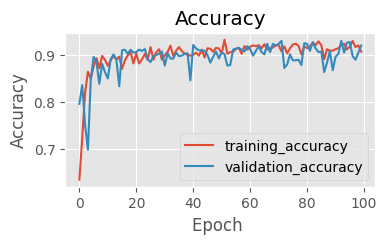

In [ ]:
N = np.arange(0, 100) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["accuracy"], label="training_accuracy")
plt.plot(N, history.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedimages/accwithoutanyprocessing1.png")

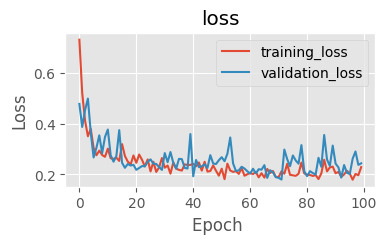

In [ ]:

N = np.arange(0, 100) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["loss"], label="training_loss")
plt.plot(N, history.history["val_loss"], label="validation_loss")
plt.title("loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")
plt.legend()
plt.savefig("/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedimages/losswithoutanyprocessing1.png")


In [ ]:
model.save('/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedmodels/melanoma_withouts_segmentation1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


=================U net segmentation===========================


In [ ]:
def unet_model(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

    # Decoder
    up4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv3)
    up4 = concatenate([up4, conv2], axis=3)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

    up5 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv4)
    up5 = concatenate([up5, conv1], axis=3)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv5)  # Adjust activation as needed

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Image data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory with target size and class mode
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/train',
    target_size=(256, 256),
    batch_size=16,
    class_mode='input',
    classes=['benign', 'malignant'],
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/Splitted/By7030/test',
    target_size=(256, 256),
    batch_size=16,
    class_mode='input',
    classes=['benign', 'malignant'],
    shuffle=False
)


Found 7423 images belonging to 2 classes.
Found 3183 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

input_shape = (256, 256, 3)  # Assuming input images are RGB and resized to 256x256
model = unet_model(input_shape)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10
464/464 [==============================] - 1902s 4s/step - loss: 0.5463 - accuracy: 0.0520 - val_loss: 0.5189 - val_accuracy: 0.0656
Epoch 2/10
464/464 [==============================] - 202s 435ms/step - loss: 0.5163 - accuracy: 0.0544 - val_loss: 0.5180 - val_accuracy: 0.0656
Epoch 3/10
464/464 [==============================] - 197s 425ms/step - loss: 0.5159 - accuracy: 0.0543 - val_loss: 0.5177 - val_accuracy: 0.0656
Epoch 4/10
464/464 [==============================] - 198s 427ms/step - loss: 0.5156 - accuracy: 0.0543 - val_loss: 0.5175 - val_accuracy: 0.0656
Epoch 5/10
464/464 [==============================] - 194s 419ms/step - loss: 0.5153 - accuracy: 0.0545 - val_loss: 0.5174 - val_accuracy: 0.0656
Epoch 6/10
464/464 [==============================] - 200s 431ms/step - loss: 0.5153 - accuracy: 0.0546 - val_loss: 0.5175 - val_accuracy: 0.0656
Epoch 7/10
464/464 [==============================] - 197s 424ms/step - loss: 0.5153 - accuracy: 0.0544 - val_loss: 0.5176 - v

In [ ]:
model.save('/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedmodels/unetmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf

# Load the model using tf.keras.models.load_model if it's a Keras model
model = tf.keras.models.load_model('/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedmodels/unetmodel.h5')

# Now 'model' is ready to use for predictions or other operations


=========Model after U net Segmenntation ====================


In [ ]:
input_shape = (224, 224, 3)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


for layer in vgg_model.layers:
    layer.trainable = False
for layer in resnet_model.layers:
    layer.trainable = False
input_tensor = Input(shape=input_shape)
vgg_output = vgg_model(input_tensor)
resnet_output = resnet_model(input_tensor)
merged = Concatenate()([GlobalAveragePooling2D()(vgg_output), GlobalAveragePooling2D()(resnet_output)])
x = Dense(1024, activation='relu')(merged)
x = Dense(1024, activation='relu')(x)
#x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/UnetSegmentedM/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/UnetSegmentedM/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

Found 7423 images belonging to 2 classes.
Found 3183 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=800 // 32
)

<ipython-input-4-794030e3dcad>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
62/62 [==============================] - 1026s 16s/step - loss: 0.7923 - accuracy: 0.6230 - val_loss: 0.5212 - val_accuracy: 0.7150
Epoch 2/100
62/62 [==============================] - 696s 11s/step - loss: 0.4520 - accuracy: 0.7868 - val_loss: 0.4148 - val_accuracy: 0.8400
Epoch 3/100
62/62 [==============================] - 494s 8s/step - loss: 0.4517 - accuracy: 0.7908 - val_loss: 0.4336 - val_accuracy: 0.8175
Epoch 4/100
62/62 [==============================] - 371s 6s/step - loss: 0.3470 - accuracy: 0.8695 - val_loss: 0.3368 - val_accuracy: 0.8650
Epoch 5/100
62/62 [==============================] - 279s 5s/step - loss: 0.3283 - accuracy: 0.8659 - val_loss: 0.3193 - val_accuracy: 0.8813
Epoch 6/100
62/62 [==============================] - 215s 3s/step - loss: 0.3339 - accuracy: 0.8654 - val_loss: 0.2686 - val_accuracy: 0.8888
Epoch 7/100
62/62 [==============================] - 161s 3s/step - loss: 0.3255 - accuracy: 0.8639 - val_loss: 0.3170 - val_accuracy: 0.8587
Epo

In [ ]:
model.save('/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedmodels/Unetsegmentedmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


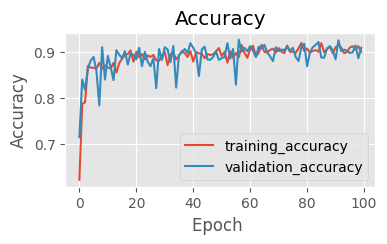

In [ ]:
N = np.arange(0, 100) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["accuracy"], label="training_accuracy")
plt.plot(N, history.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedimages/accunetsegmented.png")

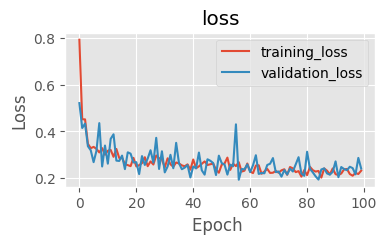

In [ ]:

N = np.arange(0, 100) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["loss"], label="training_loss")
plt.plot(N, history.history["val_loss"], label="validation_loss")
plt.title("loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")
plt.legend()
plt.savefig("/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedimages/lossunetsegmented.png")


In [ ]:
import cv2
test_data_dir='/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/UnetSegmentedM/test'
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                   target_size=(256, 256),
                                                   batch_size=32) # set as training data

Found 3183 images belonging to 2 classes.


In [ ]:
import cv2
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_one_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_one_prediction = np.argmax(model.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)

    plt.figure(figsize=(3,3))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=15) #15 refers to the degree of rotation of text
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [ ]:
clf_report(true_value, model_one_pred)

In [ ]:
#**********************************************************************************************************************

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Concatenate, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/UnetSegmentedM/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/UnetSegmentedM/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

Found 7423 images belonging to 2 classes.
Found 3183 images belonging to 2 classes.


In [ ]:
input_shape = (224, 224, 3)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


for layer in vgg_model.layers:
    layer.trainable = False
for layer in resnet_model.layers:
    layer.trainable = False
input_tensor = Input(shape=input_shape)
vgg_output = vgg_model(input_tensor)
resnet_output = resnet_model(input_tensor)
merged = Concatenate()([GlobalAveragePooling2D()(vgg_output), GlobalAveragePooling2D()(resnet_output)])
x = Dense(256, activation='relu')(merged)
#x = Dense(1024, activation='relu')(x)
#x = Dense(1024, activation='relu')(x)
output = Dense(2, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=800 // 32
)

<ipython-input-10-3cb626d73511>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
62/62 [==============================] - 26s 339ms/step - loss: 0.6086 - accuracy: 0.6999 - val_loss: 0.5265 - val_accuracy: 0.7038
Epoch 2/50
62/62 [==============================] - 24s 390ms/step - loss: 0.4678 - accuracy: 0.7943 - val_loss: 0.6898 - val_accuracy: 0.5337
Epoch 3/50
62/62 [==============================] - 25s 395ms/step - loss: 0.4050 - accuracy: 0.8286 - val_loss: 0.4095 - val_accuracy: 0.8550
Epoch 4/50
62/62 [==============================] - 25s 399ms/step - loss: 0.4181 - accuracy: 0.8241 - val_loss: 0.3821 - val_accuracy: 0.8813
Epoch 5/50
62/62 [==============================] - 20s 322ms/step - loss: 0.3465 - accuracy: 0.8730 - val_loss: 0.4180 - val_accuracy: 0.8238
Epoch 6/50
62/62 [==============================] - 20s 326ms/step - loss: 0.3442 - accuracy: 0.8584 - val_loss: 0.3448 - val_accuracy: 0.8600
Epoch 7/50
62/62 [==============================] - 27s 431ms/step - loss: 0.3211 - accuracy: 0.8689 - val_loss: 0.3844 - val_accuracy: 0.8350

In [ ]:
#model.save('/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedmodels/UNETSEG.h5')

In [ ]:
model.save('/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedmodels/UNETSEG12.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


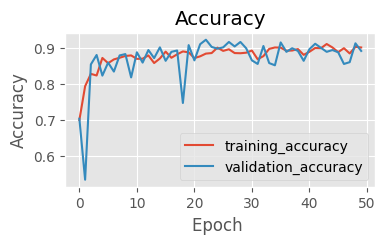

In [ ]:
N = np.arange(0, 50) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["accuracy"], label="training_accuracy")
plt.plot(N, history.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedimages/accunetsegmented.png")

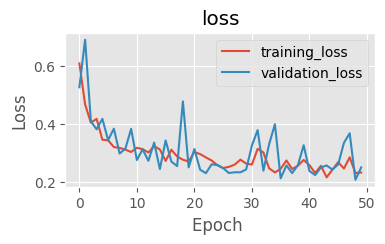

In [ ]:

N = np.arange(0, 50) #10 = epoch
plt.style.use("ggplot")
plt.figure(figsize=(4, 2)) #10=eqals width and 2 equals class
plt.plot(N, history.history["loss"], label="training_loss")
plt.plot(N, history.history["val_loss"], label="validation_loss")
plt.title("loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")
plt.legend()
plt.savefig("/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/savedimages/lossunetsegmented.png")


In [ ]:
import cv2
test_data_dir='/content/drive/MyDrive/Melanoma_Skin_Cancer_diseaseDataset/UnetSegmentedM/test'
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                   target_size=(224, 224),
                                                   batch_size=32) # set as training data

Found 3183 images belonging to 2 classes.


In [ ]:
import cv2
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_one_pred = []
for folder in os.listdir(test_data_dir):

    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))

    for image_id in test_image_ids[:int(len(test_image_ids))]:

        path = os.path.join(test_data_dir,folder,image_id)

        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255

        model_one_prediction = np.argmax(model.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)

1/1 [==============================] - 0s 24ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):

    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)

    plt.figure(figsize=(3,3))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=15) #15 refers to the degree of rotation of text
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.8595664467483506
              precision    recall  f1-score   support

      benign       0.95      0.77      0.85      1651
   malignant       0.79      0.96      0.87      1532

    accuracy                           0.86      3183
   macro avg       0.87      0.86      0.86      3183
weighted avg       0.88      0.86      0.86      3183



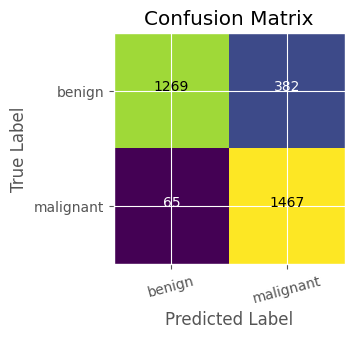

In [ ]:
clf_report(true_value, model_one_pred)

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_66 (Conv2D)          (None, 256, 256, 32)         896       ['input_7[0][0]']             
                                                                                                  
 conv2d_67 (Conv2D)          (None, 256, 256, 32)         9248      ['conv2d_66[0][0]']           
                                                                                                  
 max_pooling2d_12 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_67[0][0]']           
 ng2D)                                                                                      

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam

def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output layer
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)

    return model

# Create U-Net model
model = unet()

# Save model to .h5 file
model.save('/content/drive/MyDrive/SampleMelanoma/unet_model.h5')

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def segment_images(model, input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get list of image files in input folder
    image_files = os.listdir(input_folder)

    for file in image_files:
        # Read image
        image_path = os.path.join(input_folder, file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.IMREAD_COLOR)

        # Resize image to match input size of the model
        img = cv2.resize(img, (256, 256))
        img_array = np.expand_dims(img, axis=0)

        # Perform segmentation
        segmented_img = model.predict(img_array / 255.0)
        segmented_img = (segmented_img.squeeze() * 255).astype(np.uint8)

        # Save segmented image
        save_path = os.path.join(output_folder, f"segmented_{file}")
        cv2.imwrite(save_path, segmented_img)

# Path to folder containing images to be segmented
input_folder = '/content/drive/MyDrive/SampleMelanoma/train'

# Path to folder where segmented images will be saved
output_folder = '/content/drive/MyDrive/SampleMelanoma/segmented'

# Load pre-trained U-Net model
model = load_model('/content/drive/MyDrive/SampleMelanoma/unet_model.h5')

# Perform segmentation and save segmented images
segment_images(model, input_folder, output_folder)


1/1 [==============================] - 3s 3s/step


In [ ]:
def unet():
  #Defining the input layer and specifying the shape of the images
  inputs = Input(shape = (224,224,1))

  #defining the encoder
  s1, p1 = encoder_block(64, inputs = inputs)
  s2, p2 = encoder_block(128, inputs = p1)
  s3, p3 = encoder_block(256, inputs = p2)
  s4, p4 = encoder_block(512, inputs = p3)

  #Setting up the baseline
  baseline = baseline_layer(1024, p4)

  #Defining the entire decoder
  d1 = decoder_block(512, s4, baseline)
  d2 = decoder_block(256, s3, d1)
  d3 = decoder_block(128, s2, d2)
  d4 = decoder_block(64, s1, d3)

  #Setting up the output function for binary classification of pixels
  outputs = Conv2D(1, 1, activation = 'sigmoid')(d4)

  #Finalizing the model
  model = Model(inputs = inputs, outputs = outputs, name = 'Unet')

  return model

In [ ]:
#=======Unet Model Performed by Kaggle=====

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input, concatenate, Flatten, Dropout

In [ ]:
image_dir = '/content/drive/MyDrive/SampleMelanoma/train/'
mask_dir = '/content/drive/MyDrive/SampleMelanoma/segmented/'

In [ ]:
imgsort = sorted(os.listdir(image_dir))[1:-1]
masksort = sorted(os.listdir(mask_dir))

In [ ]:
len(imgsort), len(masksort)

(0, 1)

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def segment_images(model, input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get list of image files in input folder
    image_files = os.listdir(input_folder)

    for file in image_files:
        # Read image
        image_path = os.path.join(input_folder, file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.IMREAD_COLOR)

        # Resize image to match input size of the model
        img = cv2.resize(img, (256, 256))
        img_array = np.expand_dims(img, axis=0)

        # Perform segmentation
        segmented_img = model.predict(img_array / 255.0)
        segmented_img = (segmented_img.squeeze() * 255).astype(np.uint8)

        # Save segmented image
        save_path = os.path.join(output_folder, f"segmented_{file}")
        cv2.imwrite(save_path, segmented_img)

# Path to folder containing images to be segmented
input_folder = '/content/drive/MyDrive/melanoma_cancer_dataset/train/malignant'

# Path to folder where segmented images will be saved
output_folder = '/content/drive/MyDrive/melanoma_cancer_dataset/SegTrain/Malignant'

# Load pre-trained U-Net model
model = load_model('/content/drive/MyDrive/SampleMelanoma/unet_model.h5')

# Perform segmentation and save segmented images
segment_images(model, input_folder, output_folder)


1/1 [==============================] - 0s 22ms/step
